In [1]:
from datasets import load_dataset

# Load GoEmotions dataset
dataset = load_dataset("go_emotions")

# Explore dataset splits
print(dataset)

# Example: view first row from training set
print(dataset["train"][0])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

simplified/train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

simplified/validation-00000-of-00001.par(…):   0%|          | 0.00/350k [00:00<?, ?B/s]

simplified/test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [2]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})


In [3]:
len(dataset["train"].features["labels"].feature.names)

28

In [4]:
dataset["train"].features["labels"].feature.names

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [5]:
dataset["train"]

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 43410
})

In [6]:
emotions=dataset["train"].features["labels"].feature.names

In [7]:
import random

In [8]:
for _ in range(5):
    idx = random.randint(0, len(dataset["train"]) - 1)  # pick random row
    row = dataset["train"][idx]
    text = row["text"]
    label_ids = row["labels"]  # list of label IDs (can be multiple)
    label_names = [emotions[i] for i in label_ids]  # map IDs to emotion names

    print("Text:", text)
    print("Emotion(s):", label_names)
    print("-" * 50)

Text: I don't need any [NAME]. But if At the Gates actually I made a game, I'd be interested.
Emotion(s): ['excitement']
--------------------------------------------------
Text: What does that have to do with [NAME] having sex with a child, what's the point you're trying to make with that piece of information?
Emotion(s): ['annoyance']
--------------------------------------------------
Text: I love that when [NAME] was actually further left of HRC on a few issues like TPP.
Emotion(s): ['neutral']
--------------------------------------------------
Text: Welcome to the club, fellow [NAME]!
Emotion(s): ['gratitude']
--------------------------------------------------
Text: Ah there it is
Emotion(s): ['excitement']
--------------------------------------------------


In [9]:
import pandas as pd

train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

print(train_df.head())


                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj


In [10]:
print(train_df['text'][0])
print(train_df['labels'][0])

My favourite food is anything I didn't have to cook myself.
[27]


In [11]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (43410, 3)
Validation shape: (5426, 3)
Test shape: (5427, 3)


In [12]:
print(train_df.sample(5))

                                                    text   labels       id
1557                                 Happy new years!!!!     [17]  ed13255
23565  Can't remember how many times i died there. De...     [22]  ee1mjff
30623  So the [NAME] invading an even whiter Westeros...      [7]  edo7ci9
39639  Yeah I hope he can play against IU that’d be a...      [9]  ed76wsy
2706   Unfortunately they do at times, but it's not t...  [9, 10]  edt8giw


In [13]:
train_df['num_labels'] = train_df['labels'].apply(len)
print(train_df['num_labels'].value_counts())

num_labels
1    36308
2     6541
3      532
4       28
5        1
Name: count, dtype: int64


In [14]:
train_df['dominant_emotion'] = train_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)
val_df['dominant_emotion'] = val_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)
test_df['dominant_emotion'] = test_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)

In [15]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2
3,To make her feel threatened,[14],ed7ypvh,1,14
4,Dirty Southern Wankers,[3],ed0bdzj,1,3


In [16]:
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "grief", "joy", "love", "nervousness", "optimism",
    "pride", "realization", "relief", "remorse", "sadness", "surprise",
    "neutral"
]

In [17]:
emotions

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [18]:
train_df['emotion_name'] = train_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')
val_df['emotion_name'] = val_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')
test_df['emotion_name'] = test_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')

In [19]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger
3,To make her feel threatened,[14],ed7ypvh,1,14,fear
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance


In [20]:
emotion_to_mood = {
    # --- Joy/Positive (JP) ---
    'admiration': 'Joy/Positive',
    'amusement': 'Joy/Positive',
    'approval': 'Joy/Positive',
    'desire': 'Joy/Positive',
    'excitement': 'Joy/Positive',
    'gratitude': 'Joy/Positive',
    'joy': 'Joy/Positive',
    'love': 'Joy/Positive',
    'optimism': 'Joy/Positive',
    'pride': 'Joy/Positive',

    # --- Sadness/Grief (SG) ---
    'disappointment': 'Sadness/Grief',
    'grief': 'Sadness/Grief',
    'remorse': 'Sadness/Grief',
    'sadness': 'Sadness/Grief',

    # --- Anger/Frustration (AF) ---
    'anger': 'Anger/Frustration',
    'annoyance': 'Anger/Frustration',
    'disapproval': 'Anger/Frustration',
    'disgust': 'Anger/Frustration',

    # --- Fear/Anxiety (FA) <-- Crucially, 'nervousness' lands here! ---
    'confusion': 'Fear/Anxiety',
    'fear': 'Fear/Anxiety',
    'nervousness': 'Fear/Anxiety',

    # --- Surprise/Awe (SA) ---
    'realization': 'Surprise/Awe',
    'surprise': 'Surprise/Awe',

    # --- Neutral/Baseline (NB) ---
    'caring': 'Neutral/Baseline',
    'curiosity': 'Neutral/Baseline',
    'embarrassment': 'Neutral/Baseline',
    'relief': 'Neutral/Baseline',
    'neutral': 'Neutral/Baseline',
}

In [21]:
train_df['mood'] = train_df['emotion_name'].apply(lambda x: emotion_to_mood[x])
val_df['mood'] = val_df['emotion_name'].apply(lambda x: emotion_to_mood[x])
test_df['mood'] = test_df['emotion_name'].apply(lambda x: emotion_to_mood[x])

In [22]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name,mood
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral,Neutral/Baseline
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral,Neutral/Baseline
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger,Anger/Frustration
3,To make her feel threatened,[14],ed7ypvh,1,14,fear,Fear/Anxiety
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance,Anger/Frustration


In [23]:
print(train_df['mood'].value_counts())

mood
Neutral/Baseline     15905
Joy/Positive         15886
Anger/Frustration     5916
Sadness/Grief         2371
Fear/Anxiety          1883
Surprise/Awe          1449
Name: count, dtype: int64


In [24]:
print(train_df['text'].isnull().sum())

0


In [25]:
print(test_df['text'].isnull().sum())

0


In [26]:
print(val_df['text'].isnull().sum())

0


In [27]:
train_df['text_length'] = train_df['text'].apply(len)
print(train_df['text_length'].describe())

count    43410.000000
mean        68.400875
std         36.721898
min          2.000000
25%         38.000000
50%         65.000000
75%         96.000000
max        703.000000
Name: text_length, dtype: float64


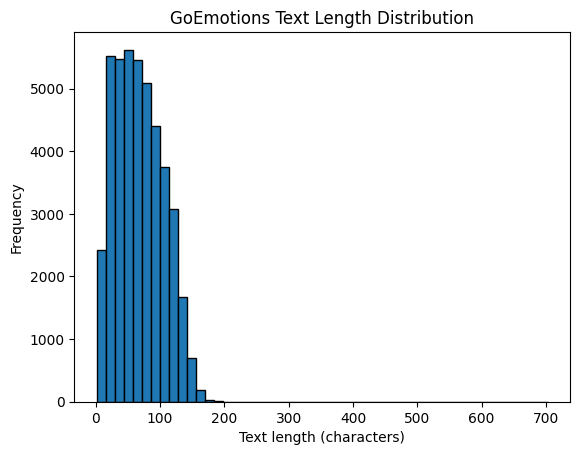

In [28]:
import matplotlib.pyplot as plt

plt.hist(train_df['text_length'], bins=50, edgecolor='black')
plt.xlabel("Text length (characters)")
plt.ylabel("Frequency")
plt.title("GoEmotions Text Length Distribution")
plt.show()

In [29]:
val_df['text_length'] = val_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)
train_df = train_df[train_df['text_length'] >= 3]
val_df = val_df[val_df['text_length'] >= 3]
test_df = test_df[test_df['text_length'] >= 3]

In [30]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (43408, 8)
Validation shape: (5426, 7)
Test shape: (5427, 7)


In [31]:
train_df.columns

Index(['text', 'labels', 'id', 'num_labels', 'dominant_emotion',
       'emotion_name', 'mood', 'text_length'],
      dtype='object')

In [32]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name,mood,text_length
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral,Neutral/Baseline,59
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral,Neutral/Baseline,112
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger,Anger/Frustration,30
3,To make her feel threatened,[14],ed7ypvh,1,14,fear,Fear/Anxiety,27
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance,Anger/Frustration,22


In [33]:
test_df.columns

Index(['text', 'labels', 'id', 'dominant_emotion', 'emotion_name', 'mood',
       'text_length'],
      dtype='object')

In [34]:
test_df.head()

,text,labels,id,dominant_emotion,emotion_name,mood,text_length
0,I’m really sorry about your situation :( Altho...,[25],eecwqtt,25,sadness,Sadness/Grief,99
1,It's wonderful because it's awful. At not with.,[0],ed5f85d,0,admiration,Joy/Positive,47
2,"Kings fan here, good luck to you guys! Will be...",[13],een27c3,13,excitement,Joy/Positive,77
3,"I didn't know that, thank you for teaching me ...",[15],eelgwd1,15,gratitude,Joy/Positive,62
4,They got bored from haunting earth for thousan...,[27],eem5uti,27,neutral,Neutral/Baseline,99


In [35]:
train_df = train_df.drop(columns=["num_labels"])

In [36]:
print("Train duplicates:", train_df.duplicated(subset=["text"]).sum())
print("Validation duplicates:", val_df.duplicated(subset=["text"]).sum())
print("Test duplicates:", test_df.duplicated(subset=["text"]).sum())


Train duplicates: 183
Validation duplicates: 3
Test duplicates: 6


In [37]:
dupes = train_df[train_df.duplicated(subset=["text"], keep=False)]
dupes.sort_values("text").head(20)

,text,labels,id,dominant_emotion,emotion_name,mood,text_length
1030,"A surprise to be sure, but a welcome one.",[20],eeo9eeh,20,optimism,Joy/Positive,41
41866,"A surprise to be sure, but a welcome one.",[13],edwu7dp,13,excitement,Joy/Positive,41
22935,"A surprise to be sure, but a welcome one.",[26],edgjk3k,26,surprise,Surprise/Awe,41
16095,Amen to that!,[4],ed7tfmt,4,approval,Joy/Positive,13
37409,Amen to that!,[27],eerourf,27,neutral,Neutral/Baseline,13
26898,Anytime :),[27],edget3c,27,neutral,Neutral/Baseline,10
891,Anytime :),[27],eelce7s,27,neutral,Neutral/Baseline,10
27042,Are you serious?,"[6, 7]",eezlyf8,6,confusion,Fear/Anxiety,16
30285,Are you serious?,[7],ee9m45v,7,curiosity,Neutral/Baseline,16
8434,Are you serious?,[7],edfbj9s,7,curiosity,Neutral/Baseline,16


In [38]:
train_df = train_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)
val_df   = val_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)
test_df  = test_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)


In [39]:
def resolve_conflicts(df):
    return (
        df.groupby("text")["mood"]
          .agg(lambda x: x.value_counts().index[0])  # pick majority label
          .reset_index()
    )

train_df = resolve_conflicts(train_df)
val_df   = resolve_conflicts(val_df)
test_df  = resolve_conflicts(test_df)


In [40]:
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


Train: (43225, 2)
Validation: (5423, 2)
Test: (5421, 2)


In [41]:
print("Train duplicates left:", train_df.duplicated(subset=["text"]).sum())
print("Val duplicates left:", val_df.duplicated(subset=["text"]).sum())
print("Test duplicates left:", test_df.duplicated(subset=["text"]).sum())

Train duplicates left: 0
Val duplicates left: 0
Test duplicates left: 0


In [42]:
print(train_df["mood"].value_counts())


mood
Neutral/Baseline     15858
Joy/Positive         15782
Anger/Frustration     5903
Sadness/Grief         2363
Fear/Anxiety          1876
Surprise/Awe          1443
Name: count, dtype: int64


In [43]:
train_df.head()

,text,mood
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",Anger/Frustration
1,"""What do Scottish people look like?"" How I wo...",Neutral/Baseline
2,"### A surprise, to be sure, but a welcome one",Surprise/Awe
3,"'*Pray*, v. To ask that the laws of the unive...",Neutral/Baseline
4,">it'll get invaded by tankie, unfortunately. ...",Neutral/Baseline


In [44]:
test_df.head()

,text,mood
0,"I have worked at a shitty, south side smoke s...",Joy/Positive
1,"Now, can you make another applet to change hi...",Neutral/Baseline
2,Students: North and South Dakota have finally...,Neutral/Baseline
3,Their official logic is that it reduces turn-...,Neutral/Baseline
4,"You're welcome, I think.",Joy/Positive


In [45]:
val_df.head()

,text,mood
0,Calm down and relax are the worst things to s...,Anger/Frustration
1,it sounds like you're setting up for a good 2...,Joy/Positive
2,"thanks bot! You too man!......Soooooo, what d...",Joy/Positive
3,"🎶 Hark to the tale of [NAME], and the boy he ...",Neutral/Baseline
4,! good bot,Joy/Positive


In [46]:
# 1. Define the final 6 labels in the order you want them indexed (0 to 5)
# It's good practice to sort them alphabetically for consistency,
# but since you already have a distribution, we'll define them explicitly:
mood_labels = [
    'Anger/Frustration',
    'Fear/Anxiety',
    'Joy/Positive',
    'Neutral/Baseline',
    'Sadness/Grief',
    'Surprise/Awe'
]

# 2. Create the mapping dictionary (Mood String -> Integer ID)
mood_to_id = {mood: i for i, mood in enumerate(mood_labels)}
print("Mood to ID Mapping:")
print(mood_to_id)

# 3. Apply this mapping to create the final integer target column (Y variable)
train_df['label_id'] = train_df['mood'].apply(lambda x: mood_to_id[x])
val_df['label_id'] = val_df['mood'].apply(lambda x: mood_to_id[x])
test_df['label_id'] = test_df['mood'].apply(lambda x: mood_to_id[x])

print(f"\nTotal number of classes for BERT model: {len(mood_labels)}")

Mood to ID Mapping:
{'Anger/Frustration': 0, 'Fear/Anxiety': 1, 'Joy/Positive': 2, 'Neutral/Baseline': 3, 'Sadness/Grief': 4, 'Surprise/Awe': 5}

Total number of classes for BERT model: 6


In [47]:
from google.colab import drive

# This command mounts your Google Drive to the location /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

In [49]:
train_df.rename(columns={'label_id': 'label'}, inplace=True)
val_df.rename(columns={'label_id': 'label'}, inplace=True)
test_df.rename(columns={'label_id': 'label'}, inplace=True)

In [50]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [51]:
class EmotionDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=64):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [52]:
train_dataset = EmotionDataset(train_df, tokenizer)
val_dataset = EmotionDataset(val_df, tokenizer)
test_dataset = EmotionDataset(test_df, tokenizer)

In [53]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)

print("✅ Balanced datasets loaded and tokenized!")
print(f"Train batches: {len(train_loader)}, Validation batches: {len(val_loader)}")

✅ Balanced datasets loaded and tokenized!
Train batches: 5404, Validation batches: 678


In [ ]:
import torch
from torch import nn
from transformers import BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=6
)
model = model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = AdamW(model.parameters(), lr=5e-6, eps=1e-8, weight_decay=0.05)
epochs = 12
total_steps = len(train_loader) * epochs

num_warmup_steps = int(0.1 * total_steps)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=total_steps
)

In [ ]:
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc="Training", leave=False):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()
    return total_loss / len(data_loader)

In [ ]:
def eval_epoch(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Validating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

In [ ]:
import torch

# Initialize trackers
train_losses = []
val_losses = []
val_accuracies = []

best_val_loss = float('inf')
patience = 3  # Number of epochs to wait before stopping
epochs_without_improvement = 0

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # ---- Training Phase ----
    train_loss = train_epoch(model, train_loader, optimizer, device, scheduler)

    # ---- Validation Phase ----
    val_loss, val_acc = eval_epoch(model, val_loader, device)

    # ---- Logging ----
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # ---- Check for Improvement ----
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0

        # Save the best model
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_loss': best_val_loss
        }, "best_bert_emotion_model.pth")

        print("✅ New best model found and saved!")
    else:
        epochs_without_improvement += 1
        print(f"🛑 No validation loss improvement for {epochs_without_improvement} epochs.")

        # ---- Early Stopping ----
        if epochs_without_improvement >= patience:
            print("⏹️ Early stopping triggered.")
            break

print("✅ Training complete!")

# ---- Load the Best Model for Final Evaluation ----
checkpoint = torch.load("best_bert_emotion_model.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
print(f"✅ Best model loaded (Epoch {checkpoint['epoch']}, Val Loss: {checkpoint['val_loss']:.4f})")



Epoch 1/12


Train Loss: 1.1854 | Val Loss: 0.8951 | Val Acc: 0.6852
✅ New best model found and saved!

Epoch 2/12


Train Loss: 0.8193 | Val Loss: 0.7977 | Val Acc: 0.7074
✅ New best model found and saved!

Epoch 3/12


Train Loss: 0.7063 | Val Loss: 0.7995 | Val Acc: 0.7074
🛑 No validation loss improvement for 1 epochs.

Epoch 4/12


Train Loss: 0.6128 | Val Loss: 0.8458 | Val Acc: 0.6989
🛑 No validation loss improvement for 2 epochs.

Epoch 5/12


Train Loss: 0.5183 | Val Loss: 0.9111 | Val Acc: 0.6915
🛑 No validation loss improvement for 3 epochs.
⏹️ Early stopping triggered.
✅ Training complete!
✅ Best model loaded (Epoch 2, Val Loss: 0.7977)


In [ ]:
import shutil

# Move the model file to your Drive folder
shutil.move("best_bert_emotion_model.pth", "/content/drive/MyDrive/best_bert_emotion_model.pth")

print("✅ Model saved to your Google Drive at: /content/drive/MyDrive/best_bert_emotion_model.pth")


✅ Model saved to your Google Drive at: /content/drive/MyDrive/best_bert_emotion_model.pth


In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/bert_emotion_tokenizer")
print("✅ Tokenizer saved to Drive at: /content/drive/MyDrive/bert_emotion_tokenizer")

✅ Tokenizer saved to Drive at: /content/drive/MyDrive/bert_emotion_tokenizer


✅ Best model loaded from Drive (Epoch 2, Val Loss: 0.7977)


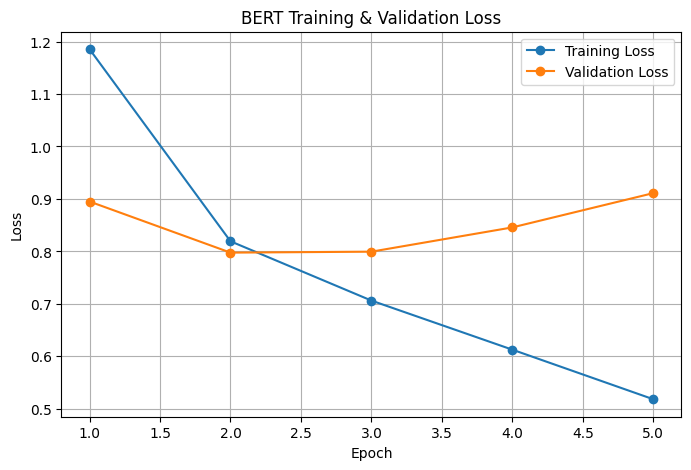

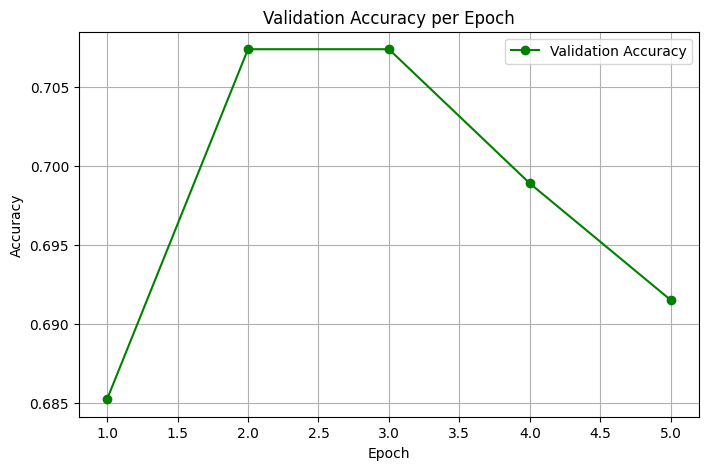

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score

# ==== 1️⃣ Load best model from Drive ====
model_path = "/content/drive/MyDrive/best_bert_emotion_model.pth"

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

print(f"✅ Best model loaded from Drive (Epoch {checkpoint['epoch']}, Val Loss: {checkpoint['val_loss']:.4f})")

# ==== 2️⃣ Plot Training & Validation Loss ====
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# ==== 3️⃣ Plot Validation Accuracy per Epoch ====
plt.figure(figsize=(8,5))
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracy', color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ==== 5️⃣ Compute Metrics ====
f1 = f1_score(all_labels, all_preds, average='weighted')
accuracy = accuracy_score(all_labels, all_preds)

print(f"\n✅ Final Validation Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1-score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(
    all_labels,
    all_preds,
    target_names=[
        "Anger/Frustration",
        "Fear/Anxiety",
        "Joy/Positive",
        "Neutral/Baseline",
        "Sadness/Grief",
        "Surprise/Awe"
    ]
))



✅ Final Validation Accuracy: 0.7074
✅ Weighted F1-score: 0.7045

Detailed Classification Report:
                   precision    recall  f1-score   support

Anger/Frustration       0.56      0.68      0.61       759
     Fear/Anxiety       0.66      0.27      0.38       221
     Joy/Positive       0.84      0.79      0.81      2020
 Neutral/Baseline       0.67      0.73      0.70      1971
    Sadness/Grief       0.62      0.58      0.60       271
     Surprise/Awe       0.57      0.38      0.46       181

         accuracy                           0.71      5423
        macro avg       0.65      0.57      0.59      5423
     weighted avg       0.71      0.71      0.70      5423



In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Paths to model and tokenizer
model_path = "/content/drive/MyDrive/best_bert_emotion_model.pth"
tokenizer_path = "/content/drive/MyDrive/bert_emotion_tokenizer"

# Recreate the same model architecture with 6 output labels
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=6
)

# Load the fine-tuned weights
checkpoint = torch.load(model_path, map_location="cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Updated label mapping (6-class)
id2label = {
    0: "Anger/Frustration",
    1: "Fear/Anxiety",
    2: "Joy/Positive",
    3: "Neutral/Baseline",
    4: "Sadness/Grief",
    5: "Surprise/Awe"
}

# ---- Prediction Function ----
def predict_emotion(sentence):
    # Tokenize the input
    inputs = tokenizer(
        sentence,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=64
    ).to(device)

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_id = torch.argmax(logits, dim=1).item()

    emotion = id2label[predicted_class_id]
    print(f"🗣️ Sentence: {sentence}")
    print(f"💡 Predicted Emotion: {emotion}")
    print("-" * 50)

# ---- Try out predictions ----
predict_emotion("I feel so happy and full of energy today!")     # Joy/Positive
predict_emotion("I am very upset and disappointed.")            # Sadness/Grief
predict_emotion("Everything is calm and peaceful right now.")   # Neutral/Baseline
predict_emotion("Why did this happen to me? I'm so angry!")     # Anger/Frustration
predict_emotion("That was absolutely shocking!")                # Surprise/Awe
predict_emotion("I'm really scared about tomorrow.")            # Fear/Anxiety



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🗣️ Sentence: I feel so happy and full of energy today!
💡 Predicted Emotion: Joy/Positive
--------------------------------------------------
🗣️ Sentence: I am very upset and disappointed.
💡 Predicted Emotion: Sadness/Grief
--------------------------------------------------
🗣️ Sentence: Everything is calm and peaceful right now.
💡 Predicted Emotion: Joy/Positive
--------------------------------------------------
🗣️ Sentence: Why did this happen to me? I'm so angry!
💡 Predicted Emotion: Anger/Frustration
--------------------------------------------------
🗣️ Sentence: That was absolutely shocking!
💡 Predicted Emotion: Surprise/Awe
--------------------------------------------------
🗣️ Sentence: I'm really scared about tomorrow.
💡 Predicted Emotion: Fear/Anxiety
--------------------------------------------------


In [ ]:
predict_emotion("I'm really nervous")

🗣️ Sentence: I'm really nervous
💡 Predicted Emotion: Fear/Anxiety
--------------------------------------------------


In [55]:
from transformers import BertForSequenceClassification

In [60]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Re-load model and tokenizer within this cell to ensure consistency ---
# Paths to saved model and tokenizer
model_path = "/content/drive/MyDrive/best_bert_emotion_model.pth"
tokenizer_path = "/content/drive/MyDrive/bert_emotion_tokenizer"

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

# Initialize model architecture
num_labels = 6 # As determined in previous steps
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Load the trained model weights directly to the target device
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device) # Ensure it's on the device
# --- End re-loading ---

# ==== 1️⃣ Set model to evaluation mode ====
model.eval()

all_test_preds = []
all_test_labels = []

# ==== 2️⃣ Run inference on test data ====
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

# ==== 3️⃣ Compute metrics ====
test_f1 = f1_score(all_test_labels, all_test_preds, average='weighted')
test_accuracy = accuracy_score(all_test_labels, all_test_preds)

print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Weighted Test F1-score: {test_f1:.4f}")

# ==== 4️⃣ Detailed Classification Report ====
print("\n📊 Detailed Test Classification Report:")
print(classification_report(
    all_test_labels,
    all_test_preds,
    target_names=[
        "Anger/Frustration",
        "Fear/Anxiety",
        "Joy/Positive",
        "Neutral/Baseline",
        "Sadness/Grief",
        "Surprise/Awe"
    ]
))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ Final Test Accuracy: 0.7012
✅ Weighted Test F1-score: 0.6979

📊 Detailed Test Classification Report:
                   precision    recall  f1-score   support

Anger/Frustration       0.55      0.67      0.61       787
     Fear/Anxiety       0.77      0.34      0.47       229
     Joy/Positive       0.83      0.79      0.81      1929
 Neutral/Baseline       0.67      0.73      0.70      1988
    Sadness/Grief       0.62      0.51      0.56       287
     Surprise/Awe       0.52      0.31      0.39       201

         accuracy                           0.70      5421
        macro avg       0.66      0.56      0.59      5421
     weighted avg       0.71      0.70      0.70      5421

